<a href="https://colab.research.google.com/github/cmyhre2/MLA4_CTM/blob/main/MLA4_CTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #4  
**Chris Myhre**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [8]:
df = pd.read_csv('/content/drive/MyDrive/CS430/Assignment_4/banknote_authentication.csv')

### Statistical and Visual Exploration

### Splitting Data into Train/Test

In [9]:
X = df.drop(columns=['forgery'])
y = df['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Create the column transformer
numerical_transformer = MinMaxScaler()
numerical_cols = X.select_dtypes(include=np.number).columns
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols)])

# Create and fit the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

### Executing the Model

In [11]:
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

### Evaluating Model

Precision: 1.0
Recall: 0.9606299212598425
F1 Score: 0.9799196787148594


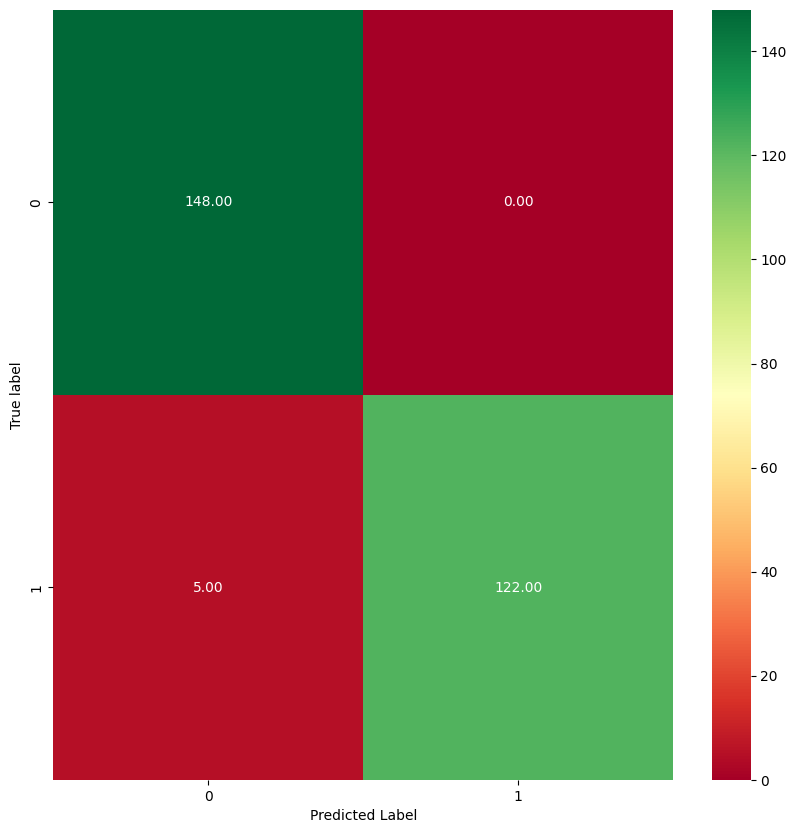

In [12]:
plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

### Conclusion
Based on the code and a Decision Tree Classifier, the model seems to be reasonably suitable for predicting banknote forgery. The inclusion of the confusion matrix, precision, recall and F1 score gives a good initial evaluation of the model's performance. But further analysis via other metrics such as AUC-ROC, along with exploring difinitive odel types (Examples being KNN & Random Forest), would be needed to draw a more definitive concllusion and possibly identify a more accurate model for this task. The current evaluation mainly focuses on a Decision Tree and doesn't consider the variability that other models may provide. More comprehensive testing and comparison are needed for a solid conclusion on suitability.

## Problem 2

### Reading the Data

In [13]:
df = pd.read_csv('/content/drive/MyDrive/CS430/Assignment_4/Steel_industry_data.csv')

In [14]:
df=df.rename(columns={'Usage_kWh':'usage_kwh',
                      'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh',
                      'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh',
                      'Lagging_Current_Power_Factor':'lag_current_pwr',
                      'Leading_Current_Power_Factor':'lead_current_pwr',
                      'NSM':'nsm',
                      'WeekStatus':'week_status',
                      'Day_of_week':'day_of_week',
                      'Load_Type':'load_type'})

### Splitting Data into Train/Test

In [15]:
X = df.drop(columns=['usage_kwh'])
y = df['usage_kwh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [16]:
numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

from sklearn.tree import DecisionTreeRegressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor())])

### Executing the Model

In [17]:
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# ### Evaluating Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.9979042632263192
Mean Squared Error: 2.3822708047945205


### Evaluating Model

In [18]:
y_pred_train = pipeline.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

Train RMSE: 2.1657504158248598e-16
Test RMSE: 1.5434606586481303


### Conclusion
  The Decision Tree Regressor, as implemented, displays mixed results for predicting kwh usage. While the R^2 value indicates the model's fit to the data, the MSE & RMSE values are necessary for understanding the prediction accuracy in kwh. A high MSE/RMSE implies the model's predictions deviate greatly from the actual kwh usage, indicating possible limitations in its predictive power.

  The significant difference between the training/testing RMSE values hints
  at overfitting. The model might be learning the training data too well and failing to generalize effectively to unseen data. More investigations are required to see if this is the case and explore methods like regularization or a different model selection to mitigate this.

  Other model types like Random Forests or Gradient Boosting should be considered due to their superior performance in regression tasks. Hyperparameter tuning is necessary to optimize model performance. Furthermore, feature engineering and additional in-depth exploration of the data might reveal additional hidden patterns/relationships relevant for improving prediction accuracy. The current model's suitability is questionable without additional analysis/refinement.